# Task 6 : Prediction using Decision Tree Algorithm

#### Problem Statement:  Given here is a 'Iris' dataset. Create the Decision Tree Classifier and visualize it graphically. The purpose is that, if we feed any new data to this classifier, it would be able to identify the right class accordingly.

### Importing all the important libraries: 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import sklearn.datasets as datasets

### Understanding the data from the dataset:

In [9]:
raw_df = pd.read_csv('Iris.csv') 
df = raw_df.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
#Checking for any null values

df. isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
df.set_index('Id', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Visualising by checking a simple pairplot for this dataset:

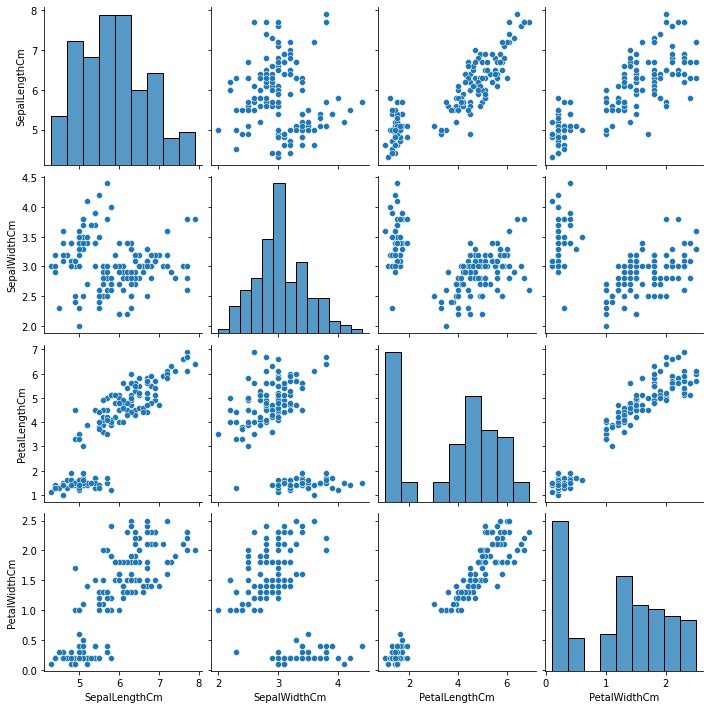

In [15]:
sns.pairplot(df)

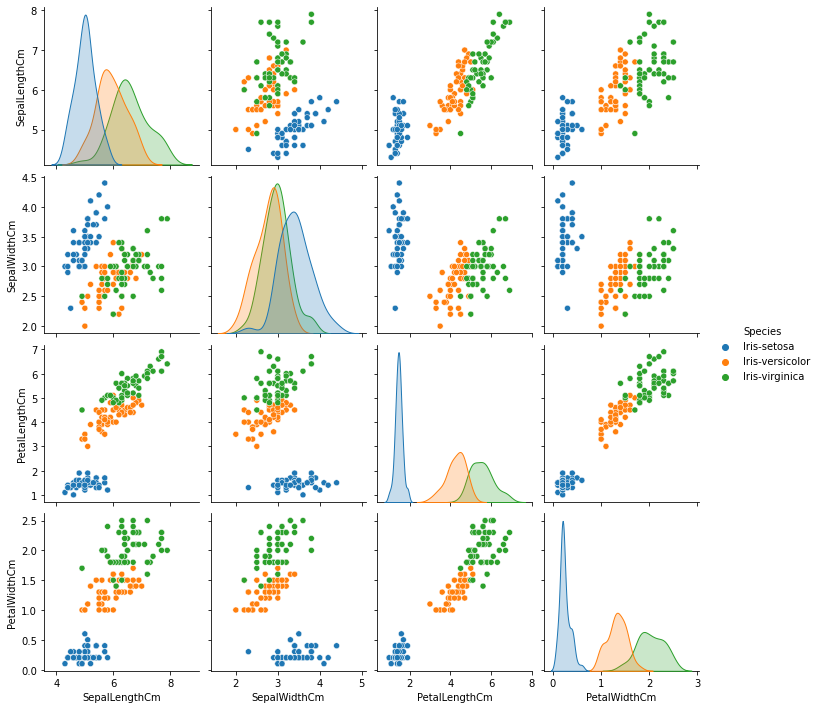

In [16]:
sns.pairplot(df,hue='Species')

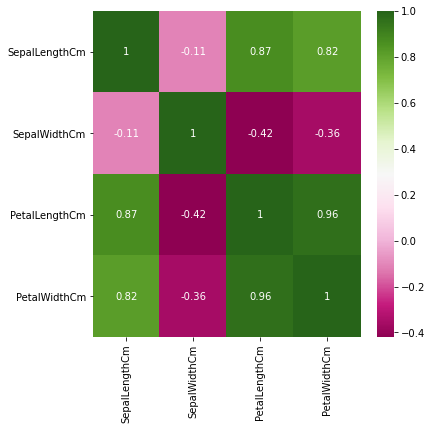

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.corr(), cmap='PiYG', annot=True, cbar=True)
ax.set_ylim([4,0])
ax.set_xlim([0,4])
ax.set_yticklabels(ax.get_xticklabels(), rotation=0);

In [18]:
df_tmp=df.copy()
df_tmp.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
x=df_tmp.drop(['Species'], axis=1)
y=df_tmp['Species']

### Train, Test and Splitting:

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [21]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

### Modelling: 

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
#Training a  decision tree:

dt_model=DecisionTreeClassifier(random_state=40)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

In [24]:
dt_model.score(x_train, y_train)

dt_model.score(x_test, y_test)

0.9473684210526315

### Predicting and Evaluating: 

In [25]:
### making predictions on the test data:

y_preds=dt_model.predict(x_test)

y_preds

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 12]], dtype=int64)

In [27]:
# training and evaluating the accuracy score:

dt_model.fit(x_train, y_train)
score1=dt_model.score(x_train, y_train)
score2=dt_model.score(x_test, y_test)

print('Training accuracy: ', score1)
print('Validation accuracy: ', score2)

Training accuracy:  1.0
Validation accuracy:  0.9473684210526315


### Tree Visualisation:

In [28]:
from sklearn.tree import export_graphviz
from six import StringIO 

from IPython.display import Image  

import pydotplus


In [29]:
dot_data = StringIO()

export_graphviz(dt_model, out_file=dot_data, feature_names=x_train.columns,  
                filled=True, rounded=True,
                special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())  


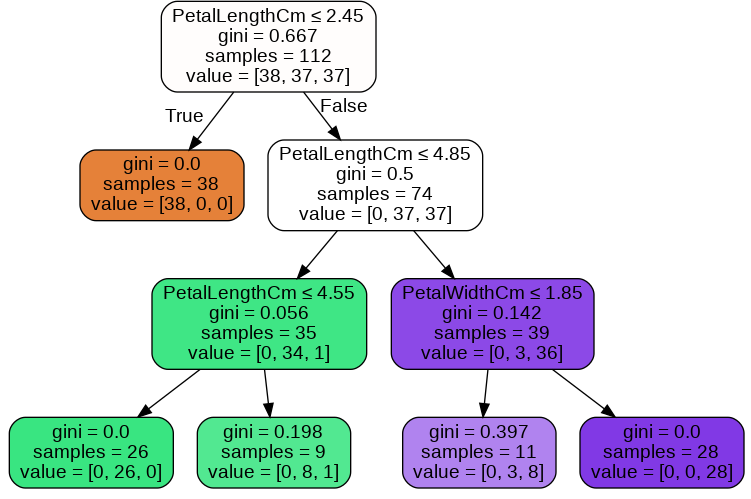

In [30]:
Image(graph.create_png())